# Data Exploration

In [28]:
import os
import os.path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# load the dataset into a dataframe
data_file_folder = 'data'
data_file_name = 'cardio_data.csv' 
data_df = pd.read_csv(os.path.join('..' , data_file_folder, data_file_name), sep=';') 

In [30]:
data_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


- 70000 entries
- 13 attributes
    - id
    - age (in days)
    - gender (1: women, 2: men)
    - height (in cm)
    - weight (in kg)
    - ap_hi (Systolic blood pressure)
    - ap_lo (Diastolic blood pressure)
    - cholesterol (1: normal, 2: above normal, 3: well above normal)
    - gluc (1: normal, 2: above normal, 3: well above normal)
    - smoke (whether patient smokes or not)
    - alco (binary feature)
    - active (binary feature)
    - cardio (target variable, binary)

In [31]:
data_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
data_df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [96]:
#missing data
missing_values = data_df.isnull().sum()
missing_data = pd.concat([total], axis=1, keys=['Total'])
missing_data

,Total
cardio,0
active,0
alco,0
smoke,0
gluc,0
cholesterol,0
ap_lo,0
ap_hi,0
weight,0
height,0


There are no missing values.

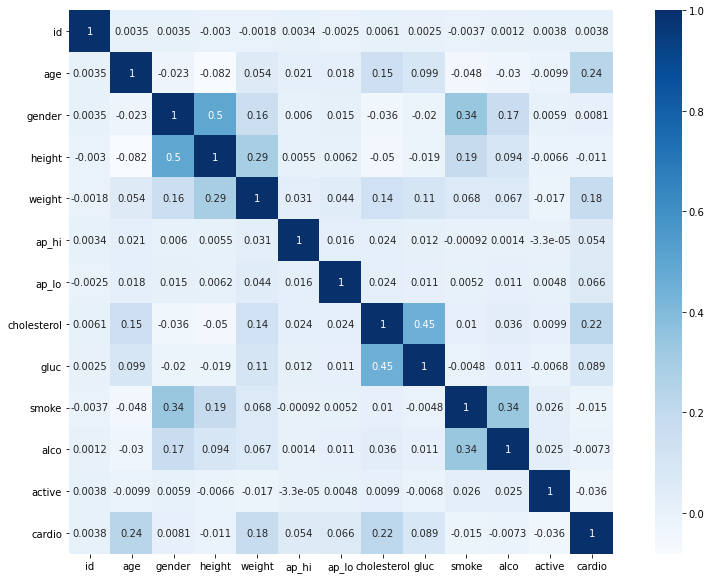

In [79]:
#correlation matrix
corrmat = data_df.corr()
x, y = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat,square=True, cmap="Blues",annot=True);

Correlations between
- gender & height
- gluc & cholesterol
- gender & smoke
- alco & smoke
- weight & height

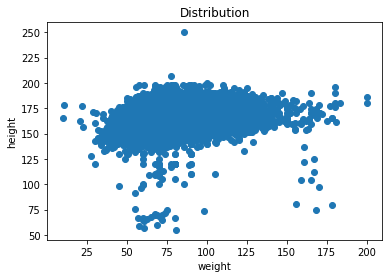

In [58]:
# create a scatter plot with the weight column on the x-axis and the height column on the y-axis
plt.scatter(data_df['weight'], data_df['height'])

# show the plot
plt.show()

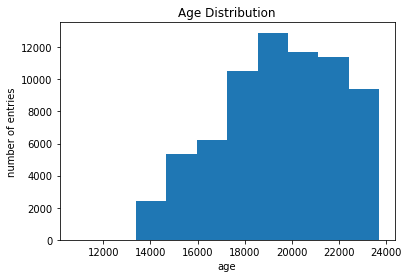

In [95]:
plt.hist(data_df['age'])
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('number of entries')
plt.show()